<a href="https://colab.research.google.com/github/scalabrinig/cdProjetoAplicadoIV/blob/master/projeto/cd_projeto_aplicado_IV_entrega_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  <img src="https://raw.githubusercontent.com/scalabrinig/cdProjetoAplicadoIV/d093146488f56dfcf0ef286bcee8efe0e71b9c76/figuras/mackenzie_logo.jpg" width="25%" align="right"/>

# **PROJETO APLICADO IV - Ciência de Dados EaD - 2025/02**


# **Entrega 3**

---

# **Titulo do Projeto**:

# **Projeto Aplicado IV – Análise de séries temporais para descrição e previsões**

In [ ]:
#@title **Identificação do Grupo e Opção do Projeto**

#@markdown Integrantes do Grupo, nome completo em ordem alfabética (*informe: \<nome\>, \<matrícula\>*)
Aluno1 = 'Carlos Oliveira, 10424072' #@param {type:"string"}
Aluno2 = 'Erick Isidoro, 10424337' #@param {type:"string"}
Aluno3 = 'Felipe Perraz, 10218996' #@param {type:"string"}


# **Introdução**

O comércio eletrônico foi consolidado como um dos principais vetores de crescimento econômico na era digital, impulsionado pela expansão do acesso à internet, pela evolução das tecnologias de informação e comunicação e pela diversificação dos hábitos de consumo. No Brasil, o setor foi responsável por um faturamento de R$ 61,9 bilhões em 2018, com crescimento médio anual de 16,5% entre 2016 e 2018, porém foram identificados desafios como ruptura de estoque, custos elevados de armazenagem e falta de previsibilidade da demanda.
Essas lacunas motivaram a aplicação de modelos de séries temporais e técnicas de machine learning para extrair conhecimento de dados históricos, reduzir perdas decorrentes da ausência de previsões adequadas e subsidiar decisões em logística e marketing. Por meio da análise temporal, serão identificadas tendências, sazonalidades e ciclos de demanda que contribuem para o equilíbrio entre oferta e demanda, a otimização de estoques e a minimização de desperdícios.

O Objetivo do projeto Será desenvolver um sistema de análise de séries temporais para investigar padrões de vendas no comércio eletrônico brasileiro, utilizando como base o Olist E Commerce Dataset (2016–2018), com o propósito de gerar previsões acuradas de volume de pedidos e de faturamento que subsidiem decisões estratégicas em plataformas de e commerce.

Analisar a evolução temporal dos volumes de pedidos e do faturamento em horizontes diário, semanal e mensal por produto e por região será realizada.
Identificar padrões de tendência, sazonalidade e ciclos de demanda que impactam o desempenho de vendas será efetuado.
Comparar o desempenho de modelos de séries temporais (ARIMA, ETS e Prophet) e de técnicas de machine learning (LSTM e XGBoost) será realizado.
Propor diretrizes para aplicação dos resultados na gestão de estoque, no planejamento logístico e em campanhas de marketing digital serão elaboradas.

Espera se que os resultados possibilitem a redução dos custos de estoque entre 10% e 20%, o aumento da taxa de atendimento ao cliente em até 15% e a promoção de práticas comerciais mais sustentáveis por meio da prevenção de superestoques e da obsolescência de produtos. O projeto foi alinhado aos Objetivos de Desenvolvimento Sustentável da ONU, especialmente nos eixos de crescimento econômico, inovação tecnológica e consumo responsável.

# **Referencial Teórico**

O referencial teórico deste trabalho organiza o conhecimento de forma a situar o leitor no estado da arte da previsão de séries temporais, partindo de conceitos gerais até aspectos específicos que sustentam as escolhas metodológicas. Deve explicitar como as obras consultadas contribuíram para a formulação dos objetivos e para o enquadramento do problema sem transformar a seção em um conjunto de resumos desarticulados.

No nível conceitual, o pré processamento temporal refere se ao conjunto de técnicas destinadas a tornar as séries comparáveis e consistentes ao longo do tempo, incluindo a definição de escalas temporais, a gestão de lacunas nos dados e a transformação das variáveis para facilitar a modelagem. A literatura clássica de séries temporais e os textos contemporâneos em aprendizado profundo enfatizam que decisões de agregação e de imputação afetam a validade das inferências e a robustez das comparações entre métodos.

A representação das séries por meio de janelas históricas é tratada como uma estratégia de codificação do contexto temporal que permite aos modelos aprender padrões dependentes do passado. Essa perspectiva teórica ressalta a importância de preservar relações temporais e de considerar a escala de agregação ao definir o horizonte de previsão e as hipóteses sobre a dinâmica subjacente.

A modelagem com redes LSTM encontra respaldo teórico na capacidade dessas arquiteturas de representar dependências temporais não lineares e memórias de diferentes escalas. Trabalhos fundamentais sobre redes recorrentes e sobre deep learning fornecem a base conceitual para discutir escolhas arquiteturais que equilibrem expressividade e parcimônia, bem como para analisar limitações e alternativas sem descrever procedimentos operacionais.

Em relação a previsões em múltiplos passos e à validação, a literatura apresenta diferentes estratégias que devem ser avaliadas em termos de viés e variância e em função da natureza da série. Estudos sobre esquemas de validação temporal destacam a necessidade de preservar a ordem cronológica dos dados ao estimar a capacidade de generalização e ao comparar modelos de forma justa.

A avaliação do desempenho é abordada conceitualmente por meio de métricas que capturam erros de magnitude e a capacidade de tomada de decisão. Métricas como RMSE e MAE quantificam discrepâncias absolutas enquanto R2 indica a proporção da variância explicada. Quando o objetivo envolve decisões discretas, medidas de classificação como F1 complementam a avaliação ao traduzir previsões contínuas em critérios de ação.

Os fundamentos teóricos que sustentam as escolhas metodológicas incluem a proposta original das LSTM para mitigar o problema do gradiente desaparecido e a literatura de séries temporais que orienta a agregação e a análise de dependências. Princípios do pensamento computacional orientam a decomposição do problema, a identificação de padrões e a formalização de algoritmos, o que contribui para que a metodologia seja coerente, replicável e alinhada ao estado da arte.


# **Diagrama de Solução**

O diagrama de solução descreve um pipeline linear e modular que transforma datasets brutos em previsões mensais por meio de um modelo LSTM univariado e de etapas de validação temporal. O fluxo inicia com a leitura dos arquivos brutos, seguida de junção gradual com checagens, passa pela limpeza e remoção de instâncias esparsas e pela geração de colunas temporais e cálculo de tempo de entrega. Em seguida, ocorre a agregação mensal da soma de preços e a interpolação de NaNs na série agregada quando necessário, depois vêm a normalização e a criação de sequências, o treino do LSTM com salvamento do modelo e do scaler, a previsão recursiva e a inversão de escala e, por fim, a avaliação com conjuntos de treino, validação e previsões diretas e a geração de relatórios e visualizações. Cada bloco do diagrama corresponde a uma etapa do pipeline, como ingestão, pré-processamento, engenharia de features, agregação temporal, normalização e sequenciamento, treino do modelo, previsão multi passo, avaliação e visualização, e as setas indicam dependências de dados, assim como pontos de persistência intermediária para reproducibilidade e auditoria.

Os componentes do pipeline e suas responsabilidades estão distribuídas ao longo das etapas. Na etapa de ingestão, são recebidos múltiplos arquivos em formatos CSV ou Parquet referentes a orders, customers, products, sellers, order_items, reviews e geolocation, e a responsabilidade dessa etapa é realizar a leitura com pandas, parsing de timestamps, definição de tipos e checagem inicial de integridade. A integração e junção gradativa parte das tabelas individuais e realiza merges faseados por chaves como order_id, product_id, seller_id e customer_id, incluindo verificação de cardinalidade após cada join e registro de perdas ou duplicações nos logs. A limpeza e filtragem atua sobre o dataframe consolidado, removendo registros esparsos e inválidos, eliminando colunas redundantes e padronizando formatos.

A engenharia de features temporais recebe o dataframe limpo e realiza conversão de timestamps, extração de ano e mês, cálculo de tempo de entrega e criação de indicadores úteis, como agregações por dia da semana ou flags de feriado quando disponíveis. A agregação e compactação temporal transforma os dados transacionais em uma série univariada mensal por meio da soma de preços, reindexação dos meses e preparação de uma série pronta para modelagem. A normalização e sequenciamento aplicam MinMaxScaler, criam janelas X de comprimento seq_length e vetores y, realizam reshape para o formato adequado ao LSTM e persistem o scaler para permitir a inversão das previsões.

O treino do modelo utiliza X e y normalizados e define uma arquitetura LSTM com camada densa, compilada com Adam e MSE, além de empregar early stopping e salvamento do melhor modelo para evitar overfitting. A previsão multi passo parte do modelo treinado e da última janela conhecida e pode ser feita de forma recursiva, realimentando previsões como entradas subsequentes, ou por meio de um modelo treinado diretamente para múltiplos passos, com o objetivo de reduzir a acumulação de erro. A etapa de avaliação e visualização recebe previsões invertidas e valores reais e calcula métricas como RMSE, MAE e R2, constrói uma métrica binarizada por limiar, executa validação walk forward com as últimas K janelas e gera gráficos comparativos e tabelas de previsões.

Pontos críticos incluem as junções, onde é preciso garantir integridade; a decisão de remover períodos esparsos, que impacta a disponibilidade de janelas; a interpolação de NaNs, que introduz suposições; e a escolha pela previsão recursiva, que pode acumular erro ao longo do horizonte.

A modularidade do pipeline facilita auditoria e reexecução de etapas isoladas, e a junção gradativa evita duplicação e permite contabilizar perdas por merge. A exclusão de 2016 e de setembro de 2018 é justificada pela baixa representatividade estatística e ajuda a manter a robustez do conjunto de treino para janelas mensais. A agregação mensal reduz ruído transacional e torna o problema tratável com poucas observações, sendo compatível com modelos LSTM simples. A normalização MinMax e o uso de um seq_length pequeno priorizam o aprendizado de dependências de curto prazo, condizentes com o horizonte de quatro meses solicitado. A validação walk forward, combinada com avaliação em múltiplas frentes, reduz o risco de overfitting e vazamento temporal e fornece estimativas de generalização mais confiáveis.

# **EDA e Pré-processamento dos dados**

A fase inicial consistiu em uma exploração descritiva dos arquivos brutos para entender a estrutura a granularidade e a variabilidade temporal das observações. Foram inspecionadas as colunas chave relacionadas à identificação de pedidos timestamps de compra e de entrega preços informações do cliente vendedor e produto avaliações e atributos de geolocalização. Geraram se resumos estatísticos univariados com contagens médias medianas e desvios e tabelas de frequência para colunas categóricas. Também foram visualizadas séries temporais agregadas por mês para identificar sazonalidade rupturas e outliers.

A inspeção exploratória permitiu localizar registros isolados e períodos com amostragem insuficiente assim como a presença de valores nulos e formatos inconsistentes nas colunas de timestamp e preço. A qualidade geral indica datasets ricos e multidimensionais porém afetados por problemas típicos de dados reais como valores ausentes em campos críticos timestamps inconsistentes e variação de granularidade temporal entre tabelas.

Registros esparsos em certos períodos por exemplo 375 registros em 2016 e apenas um registro em setembro de 2018 tornaram esses subconjuntos estatisticamente não representativos para modelagem temporal agregada. A dependência de campos agregados como a soma de preços por mês reduz a variabilidade observável ao nível de transação. Em razão disso optou se pela exclusão de 2016 e de setembro de 2018 evitando vieses causados por observações extremas e impedindo que janelas de treino fossem formadas com dados praticamente inexistentes.

Adotou se agregação mensal dos preços para facilitar comparação entre séries anuais e permitir modelagem com janelas curtas. Essa decisão sacrifica informação intra mensal mas confere maior robustez contra ruído transacional. Essas escolhas tornam o problema mais manejável mas implicam perda de resolução temporal e possível subestimação da variância presente nas vendas diárias.

Todos os arquivos foram carregados com Pandas garantindo especificação adequada de tipos e parse de timestamps para evitar erros de interpretação. Os datasets foram cruzados progressivamente por chaves primárias e estrangeiras como order_id product_id seller_id e customer_id para compor um dataframe consolidado que integra consumidores geolocalização pedidos artigos produtos vendedores e avaliações. A junção faseada permitiu validar cardinalidades após cada merge evitando duplicação e perda de registros por joins mal especificados.

A exclusão de 2016 foi motivada pela baixa representatividade estatística do ano que poderia distorcer agregados mensais e a exclusão de setembro de 2018 evitou incluir um mês com ausência de variabilidade. Foi realizada análise de padrões de ausência por coluna e colunas críticas para modelagem temporal como order_purchase_timestamp e price receberam atenção especial. Quando aplicável adotou se interpolação linear para preencher lacunas em séries mensais agregadas. Em variáveis categóricas ou identificadores os registros foram avaliados caso a caso e removidos quando inconsistentes.

Houve padronização de timestamps com conversão de order_purchase_timestamp para tipo datetime e extração de ano e mês para permitir agregação e filtragem temporal. Foi criada uma coluna derivada para tempo de entrega calculada pela diferença entre order_delivered_customer_date e order_purchase_timestamp e expressa em horas ou dias. Essa nova variável ajuda a caracterizar a logística e possíveis efeitos sobre vendas e avaliações servindo tanto para análises exploratórias quanto como potencial variável explanatória em modelos supervisionados.

A agregação mensal consistiu na soma dos preços por par mês e ano para formar séries temporais mensais. Realizou se reindexação para meses de 1 a 12 garantindo alinhamento entre anos mesmo quando houveram meses ausentes. A agregação reduz dimensionalidade e ruído tornando viável a aplicação de modelos com janelas de poucos passos. Após a compactação removeram se colunas redundantes e foram feitas conversões de tipos para reduzir uso de memória por exemplo float32 e int32 quando apropriado.

Aplicou se MinMaxScaler para normalizar a série univariada antes do treino do LSTM acelerando a convergência e evitando que magnitudes absolutas dominem a otimização. Para variáveis categóricas que eventualmente fossem usadas por exemplo categoria do produto ou região recomenda se One Hot Encoding ou target encoding conforme a cardinalidade. No pipeline atual a modelagem univariada não exigiu encodes complexos.

Construiu se o sequenciamento por janelas deslizantes X com comprimento seq_length e vetores y correspondentes ao próximo passo para treinar o LSTM univariado. Realizou se o reshape para o formato 3D exigido por camadas recorrentes com dimensão amostras timesteps e features. Para validação temporal adotou se walk forward com retenção das últimas K janelas de modo a simular predição em prontidão real e evitar vazamento temporal. A escolha de K pequena decorre da curta série disponível após filtragens.

Para o horizonte multi passos de setembro a dezembro de 2018 a previsão foi feita de forma recursiva usando a saída prevista como entrada subsequente. Essa abordagem é prática quando há poucos dados para treinar um modelo multi step direto porém acumula erro ao longo do horizonte e essa limitação foi reconhecida na análise.

#### **Importação dos dados**

In [ ]:
import pandas as pd
import kagglehub
import os

# Baixar o dataset e obter o caminho local
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")
print("Path to dataset files:", path)

# Lista dos nomes dos arquivos CSV
files = {
    'customers': 'olist_customers_dataset.csv',
    'geolocation': 'olist_geolocation_dataset.csv',
    'items': 'olist_order_items_dataset.csv',
    'payment': 'olist_order_payments_dataset.csv',
    'orders': 'olist_orders_dataset.csv',
    'products': 'olist_products_dataset.csv',
    'sellers': 'olist_sellers_dataset.csv',
    'review': 'olist_order_reviews_dataset.csv',
}

# Carregar os arquivos CSV a partir do diretório baixado
dfs = {}
for key, filename in files.items():
    full_path = os.path.join(path, filename)
    dfs[key] = pd.read_csv(full_path)

# Exibir as primeiras linhas de um dataset (exemplo: customers)
print(dfs['customers'].head())



Using Colab cache for faster access to the 'brazilian-ecommerce' dataset.
Path to dataset files: /kaggle/input/brazilian-ecommerce
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  


#### **Importação das bibliotecas**

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import folium
from folium import plugins
from sklearn.cluster import DBSCAN
print('Bibliotecas preparadas!')

Bibliotecas preparadas!


Importação dos Datasets
Foi realizada a importação de todos os datasets através do Pandas e posteriormente foram cruzados a fim de formar um único Dataframe com informações de: consumidores, geolocalização, pedidos, artigos, produtos, vendedores e avaliações.

Cruzamento entre os Datasets e Transformação de Dados

Os cruzamentos foram realizados de forma gradativa, para assegurar que não ocorresse duplicação de dados.

In [ ]:
# Cruzamento gradativo
customers_location = dfs['customers'].merge(dfs['geolocation'], how='inner', left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix').drop_duplicates('customer_id', keep='first')
cusloc_order = customers_location.merge(dfs['orders'], how='inner', on='customer_id')
cuslocord_item = cusloc_order.merge(dfs['items'], how='inner', on='order_id')
cuslocordite_prod = cuslocord_item.merge(dfs['products'], how='inner', on='product_id')
cuslocordite_rev= cuslocordite_prod.merge(dfs['review'], how='left', on='order_id')

# Selecionando as colunas de interesse
final = cuslocordite_rev[['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state',
       'geolocation_lat', 'geolocation_lng','order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_photos_qty',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp']]

#### **Conhecendo a base**

#### Tamanho do DF

In [ ]:
final.shape

(113007, 28)

O DF original contem 113007 linhas e 28 colunas

#### Nome de todas as Colunas

In [ ]:
final.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'geolocation_lat', 'geolocation_lng',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name', 'product_photos_qty',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

#### **Pré-processamento  remoção de dados e verificação de dados nulos**

Remoção dos dados do ano de 2016 por conter apenas 375 registros.

Remoção dos registros de Setembro de 2018 por conter apenas um registro.

Verificando se esxistem dados nulos.

Criando coluna de tempo de entrega.

In [ ]:
# Garantindo que todas as colunas sejam datetime
datas = [
    'order_purchase_timestamp',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'shipping_limit_date',
    'review_creation_date',
    'review_answer_timestamp'
]

for data in datas:
    final[data] = pd.to_datetime(final[data], errors='coerce')  # Converter e tratar erros

# Criando coluna de tempo de entrega
final['delivery_time'] = (final['order_delivered_customer_date'] - final['order_purchase_timestamp']).dt.days

# Seleção do período de interesse
final = final[(final['order_purchase_timestamp'].dt.year > 2016)
              &
              (final['order_purchase_timestamp'] < pd.to_datetime('20180901'))
             ]
final = final.reset_index(drop=True)
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112632 entries, 0 to 112631
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112632 non-null  object        
 1   customer_unique_id             112632 non-null  object        
 2   customer_zip_code_prefix       112632 non-null  int64         
 3   customer_city                  112632 non-null  object        
 4   customer_state                 112632 non-null  object        
 5   geolocation_lat                112632 non-null  float64       
 6   geolocation_lng                112632 non-null  float64       
 7   order_id                       112632 non-null  object        
 8   order_status                   112632 non-null  object        
 9   order_purchase_timestamp       112632 non-null  datetime64[ns]
 10  order_approved_at              112617 non-null  object        
 11  

#### **Tamanho do novo DF**

In [ ]:
final.shape

(112632, 29)

Novo tamanho do DF após inclusão de nova coluna e limpeza de dados incompletos, 112632 linhas e 29 colunas.

#### **Colunas Finais**

Demonstação do nome das colunas ja com a nova culuna tempo de entrega (delivery_time).

In [ ]:
final.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'geolocation_lat', 'geolocation_lng',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name', 'product_photos_qty',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'delivery_time'],
      dtype='object')

In [ ]:
final.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,...,freight_value,product_category_name,product_photos_qty,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.51,-47.40,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,21.88,moveis_escritorio,1.00,88b8b52d46df026a9d1ad2136a59b30b,4.00,NaN,NaN,2017-05-26,2017-05-30 22:34:40,8.00


Primeiros registros de price - visualição do fomato da serie price, dado fundamental na exploração dos dados e na previsão de vendas.

In [ ]:
print(final['price'].head(10))


0   124.99
1   289.00
2   139.94
3   149.94
4   230.00
5   259.90
6    14.99
7    19.90
8    25.00
9    99.90
Name: price, dtype: float64


#### **O que cada coluna representa**

customer_id: Identificação única do cliente (específica para o sistema).

customer_unique_id: Identificador exclusivo do cliente, usado para rastrear o mesmo cliente em várias transações.

customer_zip_code_prefix: Prefixo do código postal do cliente.

customer_city: Cidade onde o cliente está localizado.

customer_state: Estado onde o cliente está localizado.

geolocation_lat: Latitude do cliente (geolocalização).

geolocation_lng: Longitude do cliente (geolocalização).

order_id: Identificação única do pedido.

order_status: Status do pedido (por exemplo, entregue, pendente, cancelado).

order_purchase_timestamp: Data e hora em que o pedido foi realizado.

order_approved_at: Data e hora em que o pedido foi aprovado.

order_delivered_carrier_date: Data em que o pedido foi enviado ao transportador.

order_delivered_customer_date: Data em que o pedido foi entregue ao cliente.

order_estimated_delivery_date: Data estimada de entrega do pedido.

order_item_id: Identificador único de um item dentro de um pedido (caso tenha múltiplos itens).

product_id: Identificador único do produto.

seller_id: Identificação única do vendedor que forneceu o produto.

shipping_limit_date: Data limite para envio do produto ao transportador.

price: Preço do produto.

freight_value: Valor do frete para o pedido.

product_category_name: Nome da categoria do produto.

product_photos_qty: Número de fotos do produto disponíveis.

review_id: Identificação única da avaliação feita pelo cliente.

review_score: Pontuação da avaliação (exemplo: de 1 a 5 estrelas).

review_comment_title: Título do comentário da avaliação.

review_comment_message: Mensagem detalhada do comentário da avaliação.

review_creation_date: Data em que o cliente criou a avaliação.

review_answer_timestamp: Data em que a avaliação foi respondida pelo sistema ou vendedor.

delivery_time: Tempo de entrega em dias (calculado com base nas datas de compra e entrega).

### **Gráfico para visualização dos valores de vendas por mês**

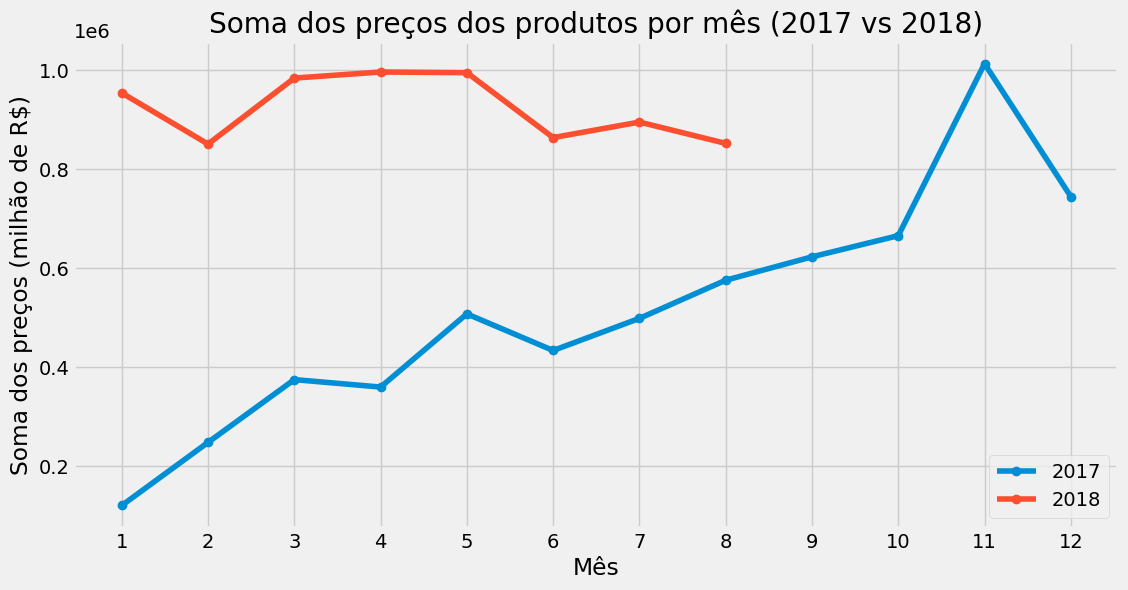

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Garantir que a coluna de data está no formato datetime
final['order_purchase_timestamp'] = pd.to_datetime(final['order_purchase_timestamp'])

# Extrair ano e mês
final['year'] = final['order_purchase_timestamp'].dt.year
final['month'] = final['order_purchase_timestamp'].dt.month

# Filtrar apenas os anos de interesse
final_filtered = final[final['year'].isin([2017, 2018])]

# Agrupar por mês e ano, somando os preços
monthly_prices = final_filtered.groupby(['month', 'year'])['price'].sum().unstack()

plt.figure(figsize=(12, 6))
plt.plot(monthly_prices.index, monthly_prices[2017], marker='o', label='2017')
plt.plot(monthly_prices.index, monthly_prices[2018], marker='o', label='2018')
plt.title('Soma dos preços dos produtos por mês (2017 vs 2018)')
plt.xlabel('Mês')
plt.ylabel('Soma dos preços (milhão de R$)')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)

A análise dos valores mensais apresentados revela que a soma de janeiro a agosto de 2018 foi de 7.393.380,41 enquanto a soma do mesmo período em 2017 foi de 3.122.446,43. A diferença absoluta entre os dois períodos é de 4.270.933,98 o que corresponde a um aumento de 136 por cento.

A comparação mês a mês mostra aumentos em todos os meses disponíveis. Em janeiro o valor passou de 121.087,90 para 954.315,46 diferença de 833.227,56 aumento de 688 por cento. Em fevereiro o aumento foi de 602.530,44 ou 242 por cento. Em março o aumento foi de 608.960,51 ou 162 por cento. Em abril o aumento foi de 636.322,06 ou 176 por cento. Em maio o aumento foi de 487.173,57 ou 95 por cento. Em junho o aumento foi de 429.924,07 ou 99 por cento. Em julho o aumento foi de 396.474,86 ou 79 por cento. Em agosto o aumento foi de 276.320,91 ou 48 por cento.

O padrão observado aponta para a coexistência de componente sazonal e de mudanças estruturais na base de vendas. O pico de novembro de 2017 de 1.013.390,56 é compatível com efeito de fim de ano e campanhas sazonais. As elevações muito expressivas no início de 2018 podem ser explicadas por alteração no mix de produtos aumento de preços campanhas comerciais ou entrada de grandes clientes, enquanto a queda progressiva nas taxas percentuais ao longo dos meses indica concentração do ganho no começo do ano e estabilização relativa em valores mais altos.

### **Visualização dos Valores de Vendas**

In [ ]:
import pandas as pd

# Garantir que a coluna de data está no formato datetime
final['order_purchase_timestamp'] = pd.to_datetime(final['order_purchase_timestamp'])

# Extrair ano e mês
final['year'] = final['order_purchase_timestamp'].dt.year
final['month'] = final['order_purchase_timestamp'].dt.month

# Filtrar apenas os anos de interesse
final_filtered = final[final['year'].isin([2017, 2018])]

# Agrupar por mês e ano, somando os preços
monthly_prices = final_filtered.groupby(['month', 'year'])['price'].sum().unstack()

# Exibir a tabela
print(monthly_prices)


year        2017      2018
month                     
1      121087.90 954315.46
2      248513.12 851043.56
3      375323.81 984284.32
4      360254.95 996577.01
5      508070.64 995244.21
6      434137.25 864061.32
7      499005.26 895480.12
8      576053.50 852374.41
9      623284.97       NaN
10     666018.23       NaN
11    1013390.56       NaN
12     744883.35       NaN


# **Modelo base**

O código importa bibliotecas para manipulação de dados e operações numéricas com pandas e numpy, para visualização com matplotlib, para pré processamento e avaliação com scikit learn e para construção e treino da rede LSTM com TensorFlow Keras. A etapa inicial converte a coluna de timestamp para datetime e extrai ano e mês para permitir filtrar e agregar os registros por mês e por ano. Em seguida selecionam se os dados de interesse referentes a 2017 e a 2018 e agregam se os preços por par mês e ano, reindexando os meses de 1 a 12 para garantir alinhamento temporal mesmo na presença de lacunas.

Para construir a série de treino selecionam se os doze meses de 2017 e os primeiros oito meses de 2018 e concatenam se essas fatias formando a sequência usada no ajuste do modelo. Quando existem valores ausentes na série agregada aplica se interpolação linear bidirecional para preencher lacunas e então reshape do vetor para que fique compatível com o MinMaxScaler. O escalonador ajusta se aos dados de treino e normaliza a série para a faixa entre zero e um, e o objeto scaler é preservado para permitir inverter previsões posteriormente.

A preparação para o LSTM inclui a criação de janelas deslizantes por meio da função create_sequences que gera vetores X de comprimento seq_length e alvos y correspondentes ao passo seguinte. Com seq_length igual a três realiza se o reshape de X para formato tridimensional exigido por camadas recorrentes. O modelo é um Sequential simples composto por uma camada LSTM de 64 unidades seguida de uma camada densa de saída única, compilado com otimizador Adam e perda MSE e treinado por 200 épocas com batch size igual a oito.

A predição para o horizonte de meses 9 a 12 de 2018 é feita de forma recursiva extraindo se a última janela normalizada do treino e gerando previsões passo a passo que são realimentadas como entrada para a iteração seguinte. As previsões normalizadas são então invertidas para a escala original usando o scaler e incorporadas à série de 2018 substituindo os meses previstos. Para avaliação define se um limiar de binarização como a média combinada dos valores reais disponíveis em 2017 e em 2018, transformando séries contínuas em classes acima ou abaixo do limiar para cálculo de métricas de F1 quando aplicável.

As métricas calculadas sobre as janelas usadas no treino mostram ajuste aparente do modelo, com R2 igual a 0,7671 indicando que cerca de 76 por cento da variância das janelas de treino é explicada pelo modelo, enquanto RMSE e MAE, respectivamente 102585.77 e 78488,64, revelam erros absolutos elevados em termos monetários. O F1 binarizado igual a 1,0 demonstra separação perfeita entre classes nas janelas de treino, sinalizando que o modelo distinguiu nitidamente observações acima e abaixo do limiar naquele conjunto.

Em termos práticos esses resultados são um diagnóstico inicial promissor quanto ao ajuste, mas insuficiente para concluir sobre generalização. Um F1 perfeito combinado com erros absolutos altos e avaliação restrita a dados vistos é compatível com sobreajuste ou com um limiar que favorece separação artificial. Recomenda se estender e robustecer a validação temporal, revisar o pré processamento e a interpolação, testar estratégias de regularização ou simplificação do modelo e considerar alternativas à predição recursiva antes de confiar nas previsões para suporte à decisão.

O gráfico obtido no resultado compara a soma dos preços mensais dos produtos entre 2017 e 2018, mostrando dados reais até agosto de 2018 e previsões para setembro a dezembro. Observa-se variação ao longo do ano que sugere comportamento sazonal e ciclos de demanda, e a comparação direta entre os anos permite avaliar se 2018 apresenta tendência de alta ou baixa em relação a 2017.

Se 2018 ficar consistentemente acima de 2017 nos meses com dados reais, isso aponta para um aumento geral dos preços ou do volume agregado, possivelmente decorrente de inflação, mudança no mix de produtos ou maior procura. Se 2018 acompanhar 2017 mas com maior volatilidade, isso indica que o mercado sofreu mais oscilações em 2018 e merece investigação sobre eventos pontuais que possam ter causado essas variações.

As previsões para os meses finais do ano aparecem como pontos amarelos e sua posição em relação às linhas reais mostra se o modelo projeta continuidade da tendência ou uma reversão.


=== Avaliação no Treino (sobre janelas usadas para treinar) ===
RMSE (treino): 104479.84
MAE  (treino): 81197.48
R2   (treino): 0.7584
F1 binarizado (treino): 1.0

=== Validação Retida (últimas K janelas) ===
RMSE (val): 118386.07
MAE  (val): 116726.01
R2   (val): -41.3020
F1 binarizado (val): N/A (classe única)

Não há valores reais nos meses 9-12 para comparar com as previsões, portanto métricas diretas não podem ser calculadas.

Previsões para 2018 (meses 9-12):
   month  predicted_price
0      9        920231.56
1     10        928963.38
2     11        934133.31
3     12        959796.19


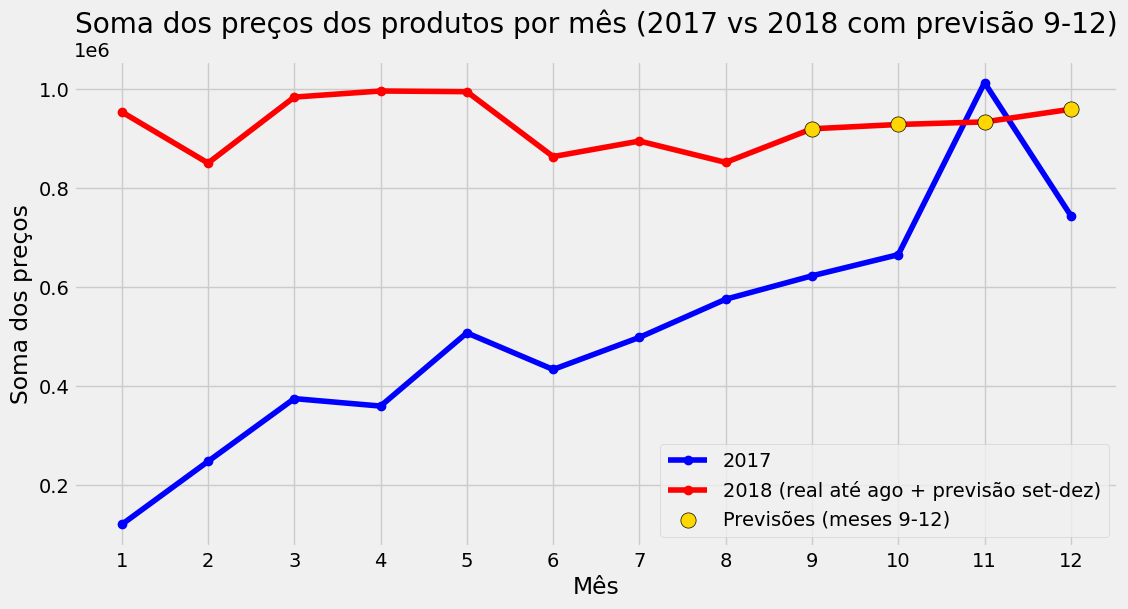

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# --- Preparação (assume que 'final' já existe com order_purchase_timestamp e price) ---
final['order_purchase_timestamp'] = pd.to_datetime(final['order_purchase_timestamp'])
final['year'] = final['order_purchase_timestamp'].dt.year
final['month'] = final['order_purchase_timestamp'].dt.month

final_filtered = final[final['year'].isin([2017, 2018])]
monthly_prices = final_filtered.groupby(['month', 'year'])['price'].sum().unstack()
monthly_prices = monthly_prices.reindex(index=range(1,13))  # garantir meses 1..12

# --- Preparar série de treino (usar 2017 completo + 2018 até agosto) ---
train_2017 = monthly_prices[2017].values  # 12 valores (pode conter NaN)
train_2018_up_to_aug = monthly_prices[2018].iloc[:8].values  # meses 1..8 de 2018

# Interpolar NaNs se necessário nos dados de treino
train_all = np.concatenate([train_2017, train_2018_up_to_aug])
s = pd.Series(train_all)
if s.isna().any():
    s = s.interpolate(limit_direction='both')
train_all = s.values.reshape(-1, 1)

# --- Normalizar ---
scaler = MinMaxScaler()
train_norm = scaler.fit_transform(train_all)

# --- Criar sequências ---
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 3
X, y = create_sequences(train_norm, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# --- Construir e treinar o LSTM ---
model = Sequential([LSTM(64, activation='tanh', input_shape=(seq_length, 1)), Dense(1)])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=200, batch_size=8, verbose=0)

# --- Previsão recursiva para meses 9..12 de 2018 ---
last_window = train_norm[-seq_length:].reshape(1, seq_length, 1)
preds_norm = []
cur = last_window.copy()
steps = 4
for _ in range(steps):
    p = model.predict(cur, verbose=0)
    preds_norm.append(p.flatten()[0])
    cur = np.concatenate([cur[:,1:,:], p.reshape(1,1,1)], axis=1)

preds_norm = np.array(preds_norm).reshape(-1, 1)
preds_inv = scaler.inverse_transform(preds_norm).flatten()  # previsões em escala original

# --- Montar série 2018 completa com previsões para meses 9..12 ---
full_2018 = monthly_prices[2018].copy()
for i, m in enumerate(range(9, 13)):
    full_2018.loc[m] = preds_inv[i]

# --- Avaliação: métricas e F1 integradas ---
import numpy as _np

# Threshold para binarização: média combinada dos valores reais disponíveis
combined_for_thresh = _np.concatenate([
    monthly_prices[2017].dropna().values,
    monthly_prices[2018].dropna().values
])
threshold = _np.nanmean(combined_for_thresh)

# 1) Avaliação no conjunto de treino (usar X e y usados no treino)
train_pred_norm = model.predict(X, verbose=0)
train_pred_inv = scaler.inverse_transform(train_pred_norm.reshape(-1,1)).flatten()
y_train_inv = scaler.inverse_transform(y.reshape(-1,1)).flatten()

rmse_train = np.sqrt(mean_squared_error(y_train_inv, train_pred_inv))
mae_train = mean_absolute_error(y_train_inv, train_pred_inv)
r2_train = r2_score(y_train_inv, train_pred_inv)
y_train_bin = (y_train_inv > threshold).astype(int)
y_train_pred_bin = (train_pred_inv > threshold).astype(int)
f1_train = f1_score(y_train_bin, y_train_pred_bin) if len(_np.unique(y_train_bin))>1 else np.nan

print("=== Avaliação no Treino (sobre janelas usadas para treinar) ===")
print(f"RMSE (treino): {rmse_train:.2f}")
print(f"MAE  (treino): {mae_train:.2f}")
print(f"R2   (treino): {r2_train:.4f}")
print(f"F1 binarizado (treino): {f1_train if not _np.isnan(f1_train) else 'N/A (classe única)'}\n")

# 2) Validação retida (walk-forward simples usando últimas K janelas)
K = 3  # ajuste conforme desejar
# Reconstruir série usada no treino (interpolada)
train_2017 = monthly_prices[2017].values
train_2018_up_to_aug = monthly_prices[2018].iloc[:8].values
train_all = _np.concatenate([train_2017, train_2018_up_to_aug])
s = pd.Series(train_all)
if s.isna().any():
    s = s.interpolate(limit_direction='both')
train_all = s.values.reshape(-1,1)

# Normalizar com o mesmo scaler (já fit)
norm = scaler.transform(train_all)

def create_seq_plain(arr, seq_length):
    Xv, yv = [], []
    for i in range(len(arr) - seq_length):
        Xv.append(arr[i:i+seq_length])
        yv.append(arr[i+seq_length])
    return _np.array(Xv), _np.array(yv)

X_all, y_all = create_seq_plain(norm, seq_length)

if X_all.shape[0] >= K:
    X_val = X_all[-K:].reshape((K, seq_length, 1))
    y_val = y_all[-K:].reshape((K,1))
    pred_val_norm = model.predict(X_val, verbose=0)
    pred_val_inv = scaler.inverse_transform(pred_val_norm).flatten()
    y_val_inv = scaler.inverse_transform(y_val).flatten()

    rmse_val = np.sqrt(mean_squared_error(y_val_inv, pred_val_inv))
    mae_val = mean_absolute_error(y_val_inv, pred_val_inv)
    r2_val = r2_score(y_val_inv, pred_val_inv)
    y_val_bin = (y_val_inv > threshold).astype(int)
    y_val_pred_bin = (pred_val_inv > threshold).astype(int)
    f1_val = f1_score(y_val_bin, y_val_pred_bin) if len(_np.unique(y_val_bin))>1 else np.nan

    print("=== Validação Retida (últimas K janelas) ===")
    print(f"RMSE (val): {rmse_val:.2f}")
    print(f"MAE  (val): {mae_val:.2f}")
    print(f"R2   (val): {r2_val:.4f}")
    print(f"F1 binarizado (val): {f1_val if not _np.isnan(f1_val) else 'N/A (classe única)'}\n")
else:
    print("Não há janelas suficientes para validação retida com K =", K)

# 3) Avaliação direta nas previsões 9..12 (quando existirem valores reais)
pred_months = [9,10,11,12]
y_true_list = []
y_pred_list = []
eval_months = []

for i, m in enumerate(pred_months):
    real = monthly_prices[2018].loc[m]  # valor real original (pode ser NaN)
    pred = preds_inv[i]
    if not pd.isna(real):
        eval_months.append(m)
        y_true_list.append(real)
        y_pred_list.append(pred)

if len(y_true_list) > 0:
    y_true_arr = _np.array(y_true_list)
    y_pred_arr = _np.array(y_pred_list)
    rmse_p = _np.sqrt(mean_squared_error(y_true_arr, y_pred_arr))
    mae_p = mean_absolute_error(y_true_arr, y_pred_arr)
    r2_p = r2_score(y_true_arr, y_pred_arr)
    y_true_bin = (y_true_arr > threshold).astype(int)
    y_pred_bin = (y_pred_arr > threshold).astype(int)
    f1_p = f1_score(y_true_bin, y_pred_bin) if len(_np.unique(y_true_bin))>1 else np.nan

    print("=== Avaliação nas Previsões (meses 9-12) ===")
    print(f"Meses avaliados: {eval_months}")
    print(f"RMSE (pred): {rmse_p:.2f}")
    print(f"MAE  (pred): {mae_p:.2f}")
    print(f"R2   (pred): {r2_p:.4f}")
    print(f"F1 binarizado (pred): {f1_p if not _np.isnan(f1_p) else 'N/A (classe única)'}")
else:
    print("Não há valores reais nos meses 9-12 para comparar com as previsões, portanto métricas diretas não podem ser calculadas.")

# --- Mostrar as previsões numéricas (meses 9..12) ---
pred_df = pd.DataFrame({'month': pred_months, 'predicted_price': preds_inv})
print("\nPrevisões para 2018 (meses 9-12):")
print(pred_df)

# --- Plotagem final: 2017 (azul) e 2018 completo com previsões destacadas ---
months = monthly_prices.index  # 1..12
plt.figure(figsize=(12,6))
plt.plot(months, monthly_prices[2017].values, marker='o', color='blue', label='2017')

plt.plot(months, full_2018.values, marker='o', color='red', label='2018 (real até ago + previsão set-dez)')

pred_vals = [full_2018.loc[m] for m in pred_months]
plt.scatter(pred_months, pred_vals, color='gold', edgecolor='black', zorder=5, s=120, label='Previsões (meses 9-12)')

plt.title('Soma dos preços dos produtos por mês (2017 vs 2018 com previsão 9-12)')
plt.xlabel('Mês')
plt.ylabel('Soma dos preços')
plt.xticks(range(1,13))
plt.grid(True)
plt.legend()
plt.show()




A série de 2017 revela uma tendência de crescimento ao longo do ano culminando em um pico em novembro com 1.013.390,56, enquanto 2018 apresenta valores mais altos desde o início do ano, por exemplo 954.315,46 em janeiro e valores próximos a 995.000 entre março e maio. A comparação visual indica que, mês a mês, 2018 supera 2017 em magnitude absoluta, o que se traduz em um ganho acumulado relevante no período analisado. As previsões marcadas no gráfico aparecem como pontos e sinalizam que o modelo espera continuidade de níveis elevados nos meses finais do ano.

# **Cronograma**

### **ok - Realizado**

### **Pr - Programado**

### **At - Atrasado**

### **Documento orininal disponibilixado no projeto**

'Cronograma - Projeto Aplicado IV.xlsx

In [ ]:
# Configurações para exibir todas as linhas e colunas
pd.set_option('display.max_rows', None)       # Mostra todas as linhas
pd.set_option('display.max_columns', None)    # Mostra todas as colunas
pd.set_option('display.width', None)          # Ajusta a largura da tela
pd.set_option('display.max_colwidth', None)   # Mostra conteúdo completo das células

# Carrega a planilha
df = pd.read_excel(r'/content/sample_data/Cronograma - Projeto Aplicado IV - 31.10.xlsx', engine='openpyxl',
                   skiprows=3)

# Exibe o DataFrame sem a coluna 'Titulo'
df.drop(columns='Titulo')

,Etapa,Atividades,Responsável,Início,Término,Duração (dias),Milestones,Status,2025-08-19 00:00:00,2025-08-20 00:00:00,2025-08-21 00:00:00,2025-08-22 00:00:00,2025-08-23 00:00:00,2025-08-24 00:00:00,2025-08-25 00:00:00,2025-08-26 00:00:00,2025-08-27 00:00:00,2025-08-28 00:00:00,2025-08-29 00:00:00,2025-08-30 00:00:00,2025-08-31 00:00:00,2025-09-01 00:00:00,2025-09-02 00:00:00,2025-09-03 00:00:00,2025-09-04 00:00:00,2025-09-05 00:00:00,2025-09-06 00:00:00,2025-09-07 00:00:00,2025-09-08 00:00:00,2025-09-09 00:00:00,2025-09-10 00:00:00,2025-09-11 00:00:00,2025-09-12 00:00:00,2025-09-13 00:00:00,2025-09-14 00:00:00,2025-09-15 00:00:00,2025-09-16 00:00:00,2025-09-17 00:00:00,2025-09-18 00:00:00,2025-09-19 00:00:00,2025-09-20 00:00:00,2025-09-21 00:00:00,2025-09-22 00:00:00,2025-09-23 00:00:00,2025-09-24 00:00:00,2025-09-25 00:00:00,2025-09-26 00:00:00,2025-09-27 00:00:00,2025-09-28 00:00:00,2025-09-29 00:00:00,2025-09-30 00:00:00,2025-10-01 00:00:00,2025-10-02 00:00:00,2025-10-03 00:00:00,2025-10-04 00:00:00,2025-10-05 00:00:00,2025-10-06 00:00:00,2025-10-07 00:00:00,2025-10-08 00:00:00,2025-10-09 00:00:00,2025-10-10 00:00:00,2025-10-11 00:00:00,2025-10-12 00:00:00,2025-10-13 00:00:00,2025-10-14 00:00:00,2025-10-15 00:00:00,2025-10-16 00:00:00,2025-10-17 00:00:00,2025-10-18 00:00:00,2025-10-19 00:00:00,2025-10-20 00:00:00,2025-10-21 00:00:00,2025-10-22 00:00:00,2025-10-23 00:00:00,2025-10-24 00:00:00,2025-10-25 00:00:00,2025-10-26 00:00:00,2025-10-27 00:00:00,2025-10-28 00:00:00,2025-10-29 00:00:00,2025-10-30 00:00:00,2025-10-31 00:00:00,2025-11-01 00:00:00,2025-11-02 00:00:00,2025-11-03 00:00:00,2025-11-04 00:00:00,2025-11-05 00:00:00,2025-11-06 00:00:00,2025-11-07 00:00:00,2025-11-08 00:00:00,2025-11-09 00:00:00,2025-11-10 00:00:00,2025-11-11 00:00:00,2025-11-12 00:00:00,2025-11-13 00:00:00,2025-11-14 00:00:00,2025-11-15 00:00:00,2025-11-16 00:00:00,2025-11-17 00:00:00,2025-11-18 00:00:00,2025-11-19 00:00:00,2025-11-20 00:00:00,2025-11-21 00:00:00,2025-11-22 00:00:00,2025-11-23 00:00:00,2025-11-24 00:00:00,2025-11-25 00:00:00,2025-11-26 00:00:00,2025-11-27 00:00:00,2025-11-28 00:00:00,2025-11-29 00:00:00,2025-11-30 00:00:00
0,1,Definição do grupo de trabalho,Erick,2025-08-21,2025-08-22,2,2025-08-30,Concluído,-,-,ok,ok,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1,1,Definição das premissas do projeto,Erick,2024-08-21,2024-08-22,2,2025-08-30,Concluído,-,-,ok,ok,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,1,Definição do tema,Carlos,2024-08-21,2024-08-22,2,2025-08-30,Concluído,-,-,ok,ok,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,1,Escolha da base de dados,Felipe,2024-08-21,2024-08-26,6,2025-08-30,Concluído,-,-,ok,ok,ok,ok,ok,ok,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,1,Organização do repositório de materiais (GitHub),Felipe,2024-08-21,2024-08-26,6,2025-08-30,Concluído,-,-,ok,ok,ok,ok,ok,ok,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
5,1,Documentação inicial,Carlos,2024-08-27,2024-08-28,2,2025-08-30,Concluído,-,-,-,-,-,-,-,-,ok,ok,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
6,1,Elaboração do documento,Carlos,2024-09-02,2024-09-11,10,2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Referências**

Hochreiter, S.; Schmidhuber, J. Long Short‑Term Memory. Neural Computation, 1997.
Goodfellow, I.; Bengio, Y.; Courville, A. Deep Learning. MIT Press, 2016.
Box, G. E. P.; Jenkins, G. M. Time Series Analysis: Forecasting and Control. 1976.
Sezer, O. B.; Kazanç, Ö. Aplicações de LSTM para previsão de séries financeiras, 2020.
Brown; Meyer. Validação temporal em séries, 2018.
Wing, J. M. Computational Thinking. Communications of the ACM, v.49, n.3, p.33–35, 2006.

SILVA, M. Pensamento Computacional: teoria e prática. Campo Grande: UFMS, 2020. Disponível em: https://repositorio.ufms.br/bitstream/123456789/8876/4/Pensamento%20Computacional.pdf. Acesso em: 20 set. 2025.

SOMAI. Entenda os pilares do pensamento computacional e potencialize sua aprendizagem. 2023. Disponível em: https://somai.com.br/blog/pilares-do-pensamento-computacional/.. Acesso em: 20 set. 2025.

https://medium.com/@iqra1804/time-series-forecasting-using-lstm-an-introduction-with-code-explanations-c5c2e8ca137d

https://www.teses.usp.br/teses/disponiveis/45/45133/tde-08042024-094807/publico/Dissertacao_Dani_Martins_Mestrado_Final_11.pdf

https://repositorio.ufgd.edu.br/jspui/bitstream/prefix/4806/1/JhonatanCorreaLeandro.pdf

https://www.datacamp.com/pt/tutorial/lstm-python-stock-market

https://towardsdatascience.com/
five-practical-applications-of-the-lstm-model-for-time-series-with-code-a7aac0aa85c0/

https://www.peteletricaufu.com.br/static/ceel/artigos/artigo_625.pdf






In [ ]:
#@title **Nota Final**
nota = 0.50*EDA_e_preprocessamento + 0.50*Modelo_base

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_nome = []

for i in range(1,4):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_nome.append(lista[0]);")

alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 10.0



,nome,nota
0,Carlos Oliveira,10.0
1,Erick Isidoro,10.0
2,Felipe Perraz,10.0


In [ ]:
#@title **Avaliação**
EDA_e_preprocessamento = 10 #@param {type:"slider", min:0, max:10, step:1}

Modelo_base = 10 #@param {type:"slider", min:0, max:10, step:1}